# Can GDP Predict Quality of Life?

An incredibly complicated and eye-opening study by Rahul Iyengar, Matthew Chen, and Sean Boerhout

## Essential Question: How does a country's GDP relate to the quality of life of its individuals?

By analyzing the relationship between a country's GDP and its population density, infant mortality, literacy rate, and even the relative number of phones people own, we can make predictions about how that country's GDP has affected (or serves as a measure of) the quality of life of its inhabitants. 

## Interesting Topics of Analysis

GDP per capita: `GDP ($ per capita)`

GDP per capita vs population density (`Pop. Density (per sq. mi.)`)
GDP per capita vs infant mortality (`Infant mortality (per 1000 births)`)
GDP per capita vs literacy rate (`Literacy (%)`)
GDP per captia vs relative number of phones (`Phones (per 1000)`)


In [74]:
# Import the necessary packages

import pandas as pd                 # For creating and manipulating the DataFrame
import numpy as np                  # For performing mathematical operations on the DataFrame
import scipy.stats as st            # Statistics package for inference
import matplotlib.pyplot as plt     # Plotting package

In [75]:
# Set the plotting style to that of ggplot
plt.style.use('ggplot')

# Import the data
df = pd.read_csv('~/Documents/School/Stats/dataproject/test1/dataframes/countries-of-the-world.csv')

## Clean The Data

We clean our data by dropping useless columns, removing rows with null data, and converting all the columns to the correct data types (most columns are strings with commas instead of decimal points, for some reason)

We also assign the row indexes to be the names of the countries the data represents and print out the first 5 rows as a preview of the new data. 

In [76]:
dropped_cols = ['Phones (per 1000)', 
                'Arable (%)', 
                'Other (%)', 
                'Climate', 
                'Agriculture', 
                'Industry', 
                'Service']
df.drop(dropped_cols, inplace=True, axis=1)
df.dropna(inplace=True)

for column in df.columns:
  if isinstance(df.loc[5, column], str) and df.loc[5, column].find(',') > 0:
    df[column] = df[column].replace(',', '.', regex=True)
    df[column] = pd.to_numeric(df[column])

print(df.head())

           Country                               Region  Population   
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997  \
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)   
0          647500                        48.0                          0.00  \
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

  Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)   
0         23,06        

## Analyze the Data

Now let's start looking at the data, starting with population density, and since we haven't looked at the GDP data yet, here's that too:

GDP ($ per capita) count      206.000000
mean      9698.058252
std      10189.540123
min        500.000000
25%       1900.000000
50%       5550.000000
75%      14850.000000
max      55100.000000
Name: GDP ($ per capita), dtype: float64


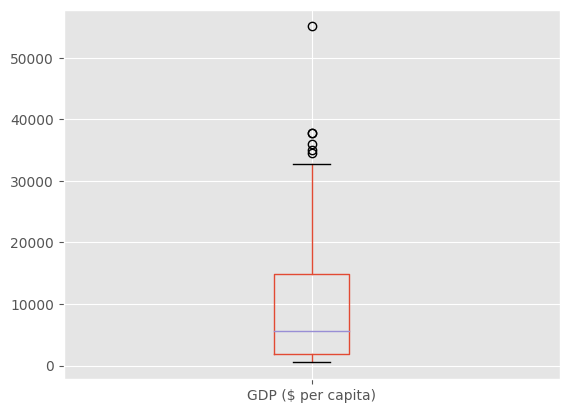

In [77]:
# Prints out a summary of the data and plots a boxplot
def summarize(series):
  print(series, df[series].describe())
  df.boxplot(column=[series])
  plt.show()

# GDP Data:
summarize('GDP ($ per capita)')

### Population Density

Here's a rundown of population density statistics:

Pop. Density (per sq. mi.) count      206.000000
mean       356.841262
std       1703.853230
min          1.800000
25%         27.525000
50%         74.200000
75%        181.450000
max      16271.500000
Name: Pop. Density (per sq. mi.), dtype: float64


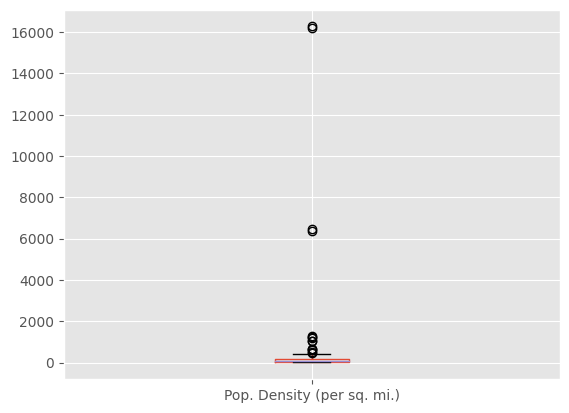

In [78]:
summarize('Pop. Density (per sq. mi.)')

We need a function to do the interpetation of the data for us, since doing that all manually would seem to mock this project:

In [79]:
def interpret_data(series_x, series_y, slope, rvalue, pvalue, stderr, alpha):
  output = 'There is a ' 
  output += ('positive') if slope > 0 else ('negative') 
  output += ', linear, and '
  output += 'moderately strong to strong' if rvalue > 0.85 else 'weak'
  output += f' relationship between {series_x} and {series_y}. \n'
  if pvalue < alpha:
    output += f'Since the p-value is less than {alpha*100}%, reject H0, and there is statistically significant evidence of a linear relationship. \n'
  else:
    output += f'Since the p-value is greater than {alpha*100}%, fail to reject H0, and there is no statistically significant evidence of a linear relationship. \n'
  # Interpret R^2
  output += f'{rvalue**2 * 100}% of the variation in {series_y} is explained by the linear relationship between {series_x} and {series_y}. \n'
  output += f'The linear regression has a standard error of {stderr}.'
  return output

And, of course, a function to plot the data with a regression line that also interprets for us:

In [80]:
def analyze(series_x, series_y, regression_line=True):
  new_df = pd.DataFrame({series_x : df[series_x],
                         series_y : df[series_y]})

  # use numpy to create a regression line
  d = np.polyfit(new_df[series_x], new_df[series_y], 1)
  f = np.poly1d(d)

  slope, intercept, rvalue, pvalue, stderr = st.linregress(new_df[series_x], new_df[series_y])

  new_df.insert(2, 'Treg', f(new_df[series_x]))
  ax = new_df.plot.scatter(x=series_x, y=series_y)
  if regression_line:
    new_df.plot(x=series_x, y='Treg', color='Red', ax=ax)
    plt.legend([series_x, f'{f}'])

  # Plot!
  plt.show()

  print(f"""Regression line for: {series_y} vs {series_x}: {str(f)}; \nR^2: {rvalue**2}; \np-value: {pvalue}""")
  print()
  print(interpret_data(series_x, series_y, slope, rvalue, pvalue, stderr, 0.05))


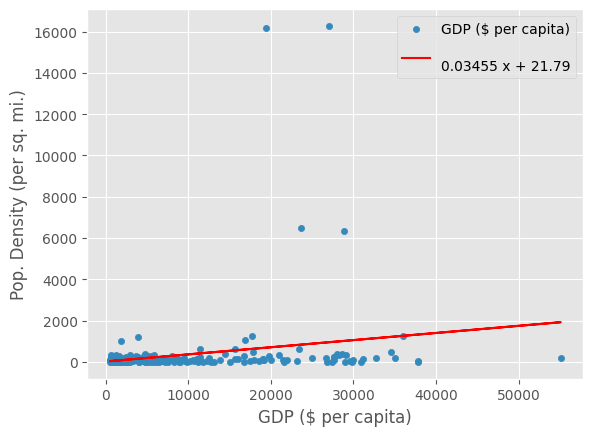

Regression line for: Pop. Density (per sq. mi.) vs GDP ($ per capita):  
0.03455 x + 21.79; 
R^2: 0.04268761978231303; 
p-value: 0.002886433114789524

There is a positive, linear, and weak relationship between GDP ($ per capita) and Pop. Density (per sq. mi.). 
Since the p-value is less than 5.0%, reject H0, and there is statistically significant evidence of a linear relationship. 
4.268761978231303% of the variation in Pop. Density (per sq. mi.) is explained by the linear relationship between GDP ($ per capita) and Pop. Density (per sq. mi.). 
The linear regression has a standard error of 0.011454848562683894.


In [81]:
analyze('GDP ($ per capita)', 'Pop. Density (per sq. mi.)', regression_line=True)

### Infant Moratality

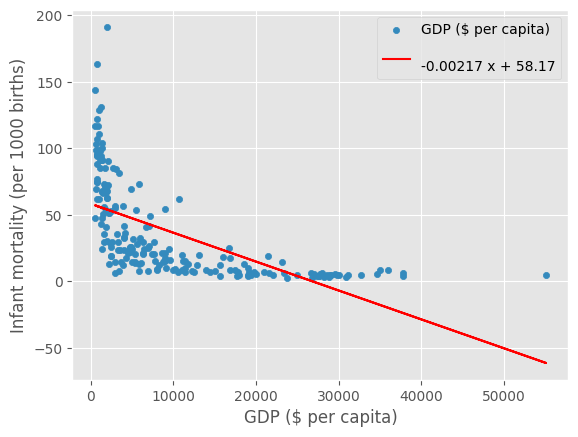

Regression line for: Infant mortality (per 1000 births) vs GDP ($ per capita):  
-0.00217 x + 58.17; 
R^2: 0.37334937127465634; 
p-value: 1.7933456531609337e-22

There is a negative, linear, and weak relationship between GDP ($ per capita) and Infant mortality (per 1000 births). 
Since the p-value is less than 5.0%, reject H0, and there is statistically significant evidence of a linear relationship. 
37.334937127465636% of the variation in Infant mortality (per 1000 births) is explained by the linear relationship between GDP ($ per capita) and Infant mortality (per 1000 births). 
The linear regression has a standard error of 0.0001968679700228374.


In [82]:
analyze('GDP ($ per capita)', 'Infant mortality (per 1000 births)', regression_line=True)